# DMG2 Assignment 2 : Problem 1

## Submitted By

**Jishnu Nair**

**PGID : 71721014**

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


warnings.filterwarnings('ignore')

In [5]:
#DATA_DIR = 'D:\\ISB\\Term3\\DMG2\\assignment\\assignment1\\datasets\\mnist'
DATA_DIR = '/home/jishnu/Documents/ISB/Term3/dmg2/assignments/hw_assignment1/dmg2/datasets/mnist'

In [6]:
train = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
test = pd.DataFrame(columns=['V{}'.format(i) for i in range(1,785)] + ['label'])
for num in range(10):
    # Consolidating training data
    temp_train = pd.read_csv(os.path.join(DATA_DIR,'train{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_train['label'] = num
    train = train.append(temp_train,ignore_index=True)
    # Consolidating test data
    temp_test = pd.read_csv(os.path.join(DATA_DIR,'test{0}.csv'.format(num)),usecols=['V{}'.format(i) for i in range(1,785)])
    temp_test['label'] = num
    test = test.append(temp_test,ignore_index=True)

In [7]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V776,V777,V778,V779,V780,V781,V782,V783,V784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train = train.dropna()
test = test.dropna()

In [9]:
train.isnull().values.any()

False

In [10]:
test.isnull().values.any()

False

## Finding Fischer discriminant for all pairs of classes

In [11]:
classPairFischer = pd.DataFrame(columns=['class_pair'] + ['d{}'.format(i) for i in range(1,785)])
for classNo,nestedClassNo in itertools.combinations(range(10), 2):
    train_temp = train.loc[train['label'].isin([classNo,nestedClassNo])]
    X_train = train_temp.iloc[:,:784]
    Y_train = train_temp.iloc[:,784]
    fisher = LinearDiscriminantAnalysis(n_components=9).fit(X_train,Y_train.astype('int'))
    df_temp = pd.DataFrame(fisher.coef_,columns=['d{}'.format(i) for i in range(1,785)])
    df_temp['class_pair'] = '{0}{1}'.format(classNo,nestedClassNo)
    classPairFischer = pd.concat([classPairFischer,df_temp],sort=False,ignore_index=True) 

In [12]:
classPairFischer.set_index('class_pair',inplace=True)

In [13]:
def scale_255(row):
    old_sum = row.sum()
    if old_sum != 0:
        row = (row / old_sum) * 255
    return row

classPairFischer = classPairFischer.apply(lambda row: scale_255(row),axis=1)


## Plotting Fisher discriminants for pairs of classes

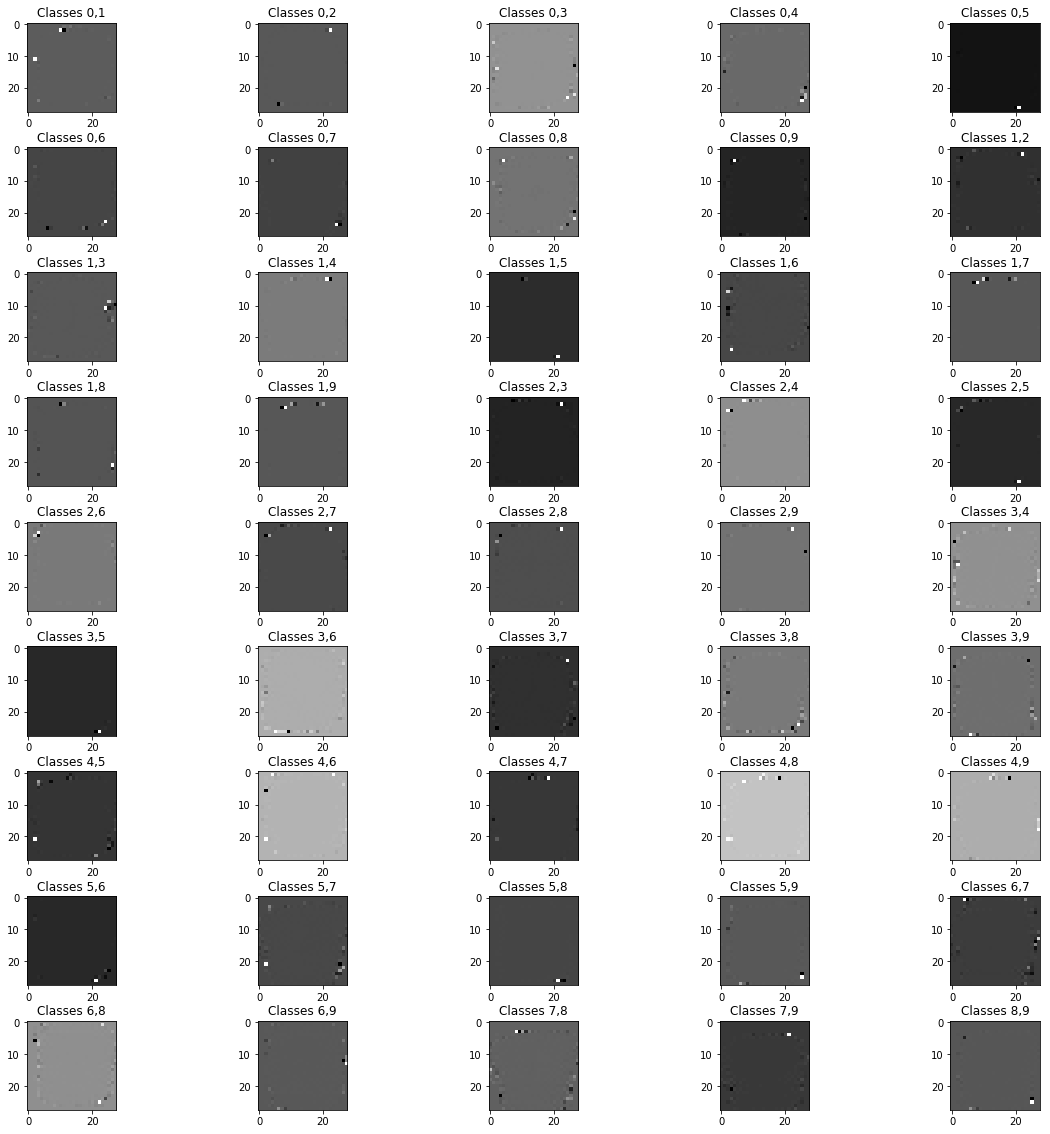

In [14]:
f,axarr = plt.subplots(9,5,figsize=[20,20])
rowIndex = 0
for x,y in itertools.product(range(9),range(5)):
    axarr[x,y].imshow(classPairFischer.iloc[rowIndex,:].values.reshape((28,28)),cmap='gray')
    axarr[x,y].set_title('Classes {0},{1}'.format(list(classPairFischer.index[rowIndex])[0],list(classPairFischer.index[rowIndex])[1]))
    rowIndex += 1
f.subplots_adjust(hspace=0.4)
plt.show()

It is seen that the fisher discriminants for certain pairs of classes are concentrated on some pixels in the 28\*28 pixel image.

For example, classes 1 and 3 have discriminant concentrated on pixels to the right, while classes 1 and 7 have discriminants concentrated on the top of the image.

This difference in pixel concentration can be attributed to the shapes of the different classes.